<h1 class="text-center">Random forest regression model</h1>

<br/>



<p class="bg-primary" style="padding:1em"><strong>Random forest</strong>  is a Supervised Learning algorithm which uses ensemble learning method for classification and regression. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees</p>

<h1>I. LOADING LIBRARIES</h1>


In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  

<h1>II. LOADING DATASETS</h1>

It has to be clean (i.e. no gaps), we need to arrange data into lists: training set, testing set and validation set for the input and an the Output data frame.

In [2]:
path ="/home/gleprince/Documents/Certificat/Projet_2/starting_kit/sample_data2"

# Données train
data_train = pd.read_csv(path+"/store_train.data",sep=" ",names = ['ID', 'day', 'date', 'nb_customer','open','promo','state','school'])

# Données solution train
cible_train = pd.read_csv(path+"/store_train.solution",sep=" ",names = ['sales'])
cible_train=cible_train["sales"]

# Données test
data_test = pd.read_csv(path+"/store_test.data",sep=" ",names = ['ID', 'day', 'date', 'nb_customer','open','promo','state','school'])

# Mise en forme des données train


In [3]:
# On spécifie le type de la date à panda
data_train[["year", "month", "dd"]] = data_train["date"].str.split("-", expand=True)

# On spécifie que la variable "state" et ID n'ont pas de relation d'ordre
data_train["state"]=pd.Categorical(data_train["state"],ordered=False)
data_train["ID"]=pd.Categorical(data_train["ID"],ordered=False)

extract_state=pd.get_dummies(data_train[["state"]])
extract_year= pd.get_dummies(data_train["year"],"year")
rest=data_train[["ID","nb_customer","open","promo","school","day","month"]]
ddata_train=pd.concat([extract_year,extract_state,rest],axis=1)


# Conversion des données en booleen

ddata_train["year_2013"] = ddata_train["year_2013"].astype(bool)
ddata_train["year_2014"] = ddata_train["year_2014"].astype(bool)
ddata_train["year_2015"] = ddata_train["year_2015"].astype(bool)

ddata_train["state_0"] = ddata_train["state_0"].astype(bool)
ddata_train["state_a"] = ddata_train["state_a"].astype(bool)
ddata_train["state_b"] = ddata_train["state_b"].astype(bool)
ddata_train["state_c"] = ddata_train["state_c"].astype(bool)

ddata_train["open"] = ddata_train["open"].astype(bool)
ddata_train["promo"] = ddata_train["promo"].astype(bool)
ddata_train["school"] = ddata_train["school"].astype(bool)


In [4]:
def encode_cycle(df, col):
    maxi = df[col].max()
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col]/maxi)
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col]/maxi)
    return df.drop(col, axis=1)

In [5]:
encode_cycle(ddata_train,"day")

,year_2013,year_2014,year_2015,state_0,state_a,state_b,state_c,ID,nb_customer,open,promo,school,month,day_sin,day_cos
0,True,False,False,True,False,False,False,625,641,True,True,False,11,0.433884,-0.900969
1,True,False,False,True,False,False,False,293,877,True,True,True,07,0.974928,-0.222521
2,False,True,False,True,False,False,False,39,561,True,True,False,01,-0.433884,-0.900969
3,True,False,False,True,False,False,False,676,1584,True,True,False,09,-0.433884,-0.900969
4,False,True,False,True,False,False,False,709,1477,True,True,False,01,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712040,False,True,False,True,False,False,False,674,611,True,False,False,09,-0.781831,0.623490
712041,False,False,True,True,False,False,False,1014,1267,True,True,False,01,-0.433884,-0.900969
712042,False,False,True,True,False,False,False,135,595,True,False,False,06,-0.781831,0.623490
712043,False,True,False,True,False,False,False,810,599,True,True,True,08,0.781831,0.623490


In [6]:
ddata_train["month"] = ddata_train["month"].astype(int) 
encode_cycle(ddata_train,"month")

,year_2013,year_2014,year_2015,state_0,state_a,state_b,state_c,ID,nb_customer,open,promo,school,day,day_sin,day_cos,month_sin,month_cos
0,True,False,False,True,False,False,False,625,641,True,True,False,3,0.433884,-0.900969,-5.000000e-01,8.660254e-01
1,True,False,False,True,False,False,False,293,877,True,True,True,2,0.974928,-0.222521,-5.000000e-01,-8.660254e-01
2,False,True,False,True,False,False,False,39,561,True,True,False,4,-0.433884,-0.900969,5.000000e-01,8.660254e-01
3,True,False,False,True,False,False,False,676,1584,True,True,False,4,-0.433884,-0.900969,-1.000000e+00,-1.836970e-16
4,False,True,False,True,False,False,False,709,1477,True,True,False,3,0.433884,-0.900969,5.000000e-01,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712040,False,True,False,True,False,False,False,674,611,True,False,False,6,-0.781831,0.623490,-1.000000e+00,-1.836970e-16
712041,False,False,True,True,False,False,False,1014,1267,True,True,False,4,-0.433884,-0.900969,5.000000e-01,8.660254e-01
712042,False,False,True,True,False,False,False,135,595,True,False,False,6,-0.781831,0.623490,1.224647e-16,-1.000000e+00
712043,False,True,False,True,False,False,False,810,599,True,True,True,1,0.781831,0.623490,-8.660254e-01,-5.000000e-01


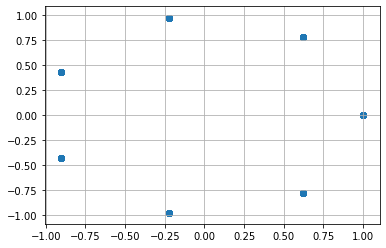

In [7]:
#plot du cycle journalier
plt.scatter(ddata_train.day_cos, ddata_train.day_sin, alpha =1)
plt.grid()

# Mise en forme des données test


In [8]:
# On spécifie le type de la date à panda
data_test[["year", "month", "dd"]] = data_test["date"].str.split("-", expand=True)

# On spécifie que la variable "state" et ID n'ont pas de relation d'ordre
data_test["state"]=pd.Categorical(data_test["state"],ordered=False)
data_test["ID"]=pd.Categorical(data_test["ID"],ordered=False)

extract_state=pd.get_dummies(data_test[["state"]])
extract_year= pd.get_dummies(data_test["year"],"year")
rest=data_test[["ID","nb_customer","open","promo","school","day","month"]]
ddata_test=pd.concat([extract_year,extract_state,rest],axis=1)

# Conversion des données en booleen


ddata_test["state_0"] = ddata_test["state_0"].astype(bool)
ddata_test["state_a"] = ddata_test["state_a"].astype(bool)
ddata_test["state_b"] = ddata_test["state_b"].astype(bool)
ddata_test["state_c"] = ddata_test["state_c"].astype(bool)

ddata_test["open"] = ddata_test["open"].astype(bool)
ddata_test["promo"] = ddata_test["promo"].astype(bool)
ddata_test["school"] = ddata_test["school"].astype(bool)


In [9]:
encode_cycle(ddata_test,"day")

,year_2013,year_2014,year_2015,state_0,state_a,state_b,state_c,ID,nb_customer,open,promo,school,month,day_sin,day_cos
0,0,1,0,True,False,False,False,249,725,True,True,False,12,-9.749279e-01,-0.222521
1,1,0,0,True,False,False,False,190,564,True,False,False,02,-4.338837e-01,-0.900969
2,1,0,0,True,False,False,False,850,644,True,True,False,06,4.338837e-01,-0.900969
3,0,0,1,True,False,False,False,776,435,True,False,False,03,-7.818315e-01,0.623490
4,0,1,0,True,False,False,False,14,799,True,True,False,10,-4.338837e-01,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203439,0,1,0,True,False,False,False,675,0,False,False,False,12,-2.449294e-16,1.000000
203440,0,0,1,True,False,False,False,930,0,False,False,False,06,-2.449294e-16,1.000000
203441,0,1,0,True,False,False,False,37,493,True,False,False,03,9.749279e-01,-0.222521
203442,0,0,1,True,False,False,False,778,791,True,True,False,01,4.338837e-01,-0.900969


In [10]:
ddata_test["month"] = ddata_test["month"].astype(int) 
encode_cycle(ddata_test,"month")

,year_2013,year_2014,year_2015,state_0,state_a,state_b,state_c,ID,nb_customer,open,promo,school,day,day_sin,day_cos,month_sin,month_cos
0,0,1,0,True,False,False,False,249,725,True,True,False,5,-9.749279e-01,-0.222521,-2.449294e-16,1.000000e+00
1,1,0,0,True,False,False,False,190,564,True,False,False,4,-4.338837e-01,-0.900969,8.660254e-01,5.000000e-01
2,1,0,0,True,False,False,False,850,644,True,True,False,3,4.338837e-01,-0.900969,1.224647e-16,-1.000000e+00
3,0,0,1,True,False,False,False,776,435,True,False,False,6,-7.818315e-01,0.623490,1.000000e+00,6.123234e-17
4,0,1,0,True,False,False,False,14,799,True,True,False,4,-4.338837e-01,-0.900969,-8.660254e-01,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203439,0,1,0,True,False,False,False,675,0,False,False,False,7,-2.449294e-16,1.000000,-2.449294e-16,1.000000e+00
203440,0,0,1,True,False,False,False,930,0,False,False,False,7,-2.449294e-16,1.000000,1.224647e-16,-1.000000e+00
203441,0,1,0,True,False,False,False,37,493,True,False,False,2,9.749279e-01,-0.222521,1.000000e+00,6.123234e-17
203442,0,0,1,True,False,False,False,778,791,True,True,False,3,4.338837e-01,-0.900969,5.000000e-01,8.660254e-01


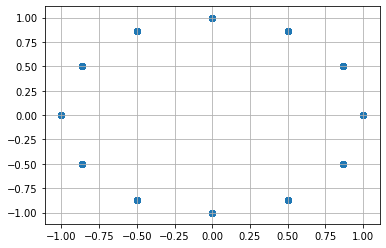

In [11]:
#plot du cycle mois
plt.scatter(ddata_test.month_cos, ddata_test.month_sin, alpha =1)
plt.grid()


# Normalisation des jeux de données

In [12]:
scaler1 = StandardScaler()  
scaler1.fit(ddata_train)  
Xnorma_train = scaler1.transform(ddata_train)  

scaler2 = StandardScaler()  
scaler2.fit(ddata_test)  
Xnorma_test = scaler2.transform(ddata_test)

#### Converting the data into np.array

In [13]:
# Turning the lists into arrays for manipulation

X_train = np.array(Xnorma_train)
X_test = np.array(Xnorma_test)
Yr_train = np.array(cible_train)

<h3>Training the random forest model on the data set </h3>

In [14]:
# We train the model with xrain dataset
# from sklearn.ensemble import ExtraTreesRegressor
# changer juste la fonction
QModel = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=100, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, oob_score=True, n_jobs=-1, random_state=None, verbose=4, warm_start=True,bootstrap=True) 
QModel.fit(X_train,Yr_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   33.7s


building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.6min


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=4,
                      warm_start=True)

<h3>Computing performance metrics for different data sets</h3>

#### For the test dataset.

In [15]:
Prediction_random_forest=QModel.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.2s finished


Création du fichier scores.txt où les résultats sont écrits

In [18]:
np.savetxt('/home/gleprince/kaggle-store-optimisation/output/score_final.predict', Prediction_random_forest, fmt='%d')